In [1]:
import pandas as pd
import string
import nltk


In [2]:
spam_dataset = pd.read_csv('spam.csv', encoding = "ISO-8859-1", usecols=[0, 1], names=['Spam', 'Text'],
                           skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
spam_dataset

C:\Users\szcze\AppData\Local\Temp\ipykernel_44392\4223080300.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])


,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
def remove_puncation(text):
    cleaned = ''.join([word for word in text if word not in string.punctuation])
    return cleaned

def tokenize(text):
    clean_text = text.lower()
    # Tokenizacja
    tokenized_text = nltk.word_tokenize(clean_text)
    return tokenized_text

def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords

lemmater = nltk.WordNetLemmatizer()
def lemmatizing(text):
    lemmatized_words = [lemmater.lemmatize(word) for word in text]
    return lemmatized_words

stopwords = nltk.corpus.stopwords.words("english")
spam_dataset['Cleaned_Text'] = spam_dataset['Text'].apply(lambda x: remove_puncation(x))
spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_Text'].apply(lambda x: tokenize(x))
spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: lemmatizing(x))

In [10]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
count_v2 = CountVectorizer(max_df=0.1, max_features=500)
X_count_v2 = count_v2.fit_transform(spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x)))
lda = LatentDirichletAllocation(n_components=7, random_state=2022,
                                learning_method='batch')
X_topics = lda.fit_transform(X_count_v2)

In [12]:
feature_names = count_v2.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f'Temat: {topic_idx+1}')
    print(' '.join([feature_names[i] for i in topic.argsort()[:-5-1:-1]]))
    print()

Temat: 1
love good day hi happy

Temat: 2
time come get yeah give

Temat: 3
ur ltgt txt send stop

Temat: 4
go im lor home ok

Temat: 5
dont know im want like

Temat: 6
call free ok phone text

Temat: 7
call na thats please claim



# Zadanie

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

y = spam_dataset['Spam']
X_train, X_test, y_train, y_test = train_test_split(
    X_topics,
    y,
    test_size=0.2,
    random_state=0
)

In [26]:


clf = RandomForestClassifier(
    n_estimators=200,
    random_state=0
)

clf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
y_pred = clf.predict(X_test)

In [28]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(classification_report(y_test, y_pred))


Accuracy: 0.9506726457399103
Precision: 0.8936170212765957
Recall: 0.7590361445783133
F1-score: 0.8208469055374593
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       949
           1       0.89      0.76      0.82       166

    accuracy                           0.95      1115
   macro avg       0.93      0.87      0.90      1115
weighted avg       0.95      0.95      0.95      1115



In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[934  15]
 [ 40 126]]


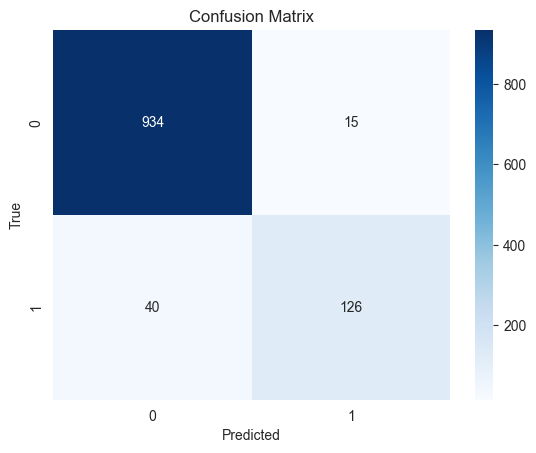

In [30]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()